# APFACE+: Comprehensive Skin Condition and Skin Type Classification

## Project Overview
APFACE+ is an innovative application designed to provide comprehensive facial skin classification through two primary models:
1. Skin Condition Classification
2. Skin Type Classification

## Notebook Purpose
This section of the APFACE+ project notebook focuses on the classification of various facial skin type using machine learning techniques. The goal is to develop a model that can accurately identify and classify skin type.

## Importing Libraries
The code below imports all the required libraries for the skin condition classification task.

In [ ]:
import os
import pickle
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer
import shutil

## Gathering and Load the Dataset

### Extract the ZIP file to the folder

In [ ]:
import zipfile

# Specify the name of the ZIP file to extract
zip_filename = "Dataset.zip"

# Extract the ZIP file without specifying a target folder
with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall()

print("File ZIP diekstrak.")

File ZIP diekstrak.


### Creating Test and Validation Directories: Setting Up Folder Structure for Dataset Management

In [ ]:
import os

# Path to the Dataset folder
base_dir = '/content/Dataset'

# Paths for the test and validation folders
test_path = os.path.join(base_dir, 'test')
valid_path = os.path.join(base_dir, 'valid')

# Create the test and validation folders if they do not already exist
os.makedirs(test_path, exist_ok=True)
os.makedirs(valid_path, exist_ok=True)

print("Folder 'test' dan 'valid' telah dibuat di:", base_dir)

Folder 'test' dan 'valid' telah dibuat di: /content/Dataset


## Data Processing

### Create validation and test for dry set from train dataset

In [ ]:
# Import libraries
import os
import shutil
import random

def create_test_valid_sets(source_path, test_path, valid_path, class_name, n_test=10, n_valid=50):
    """
    Create test and validation sets from the training dataset into the test and valid folders for each class.
    """
    # Get all files in the source directory
    files = os.listdir(source_path)
    n_files = len(files)

    # Ensure we do not try to take more files than available
    n_test = min(n_test, n_files)
    n_valid = min(n_valid, n_files - n_test)

    # Shuffle the files randomly
    random.shuffle(files)

    # Split files into test and validation sets
    test_files = files[:n_test]
    valid_files = files[n_test:n_test + n_valid]

    # Create class folders for test and valid if they don't already exist
    os.makedirs(test_path, exist_ok=True)
    os.makedirs(valid_path, exist_ok=True)

    # Create subfolders for the class
    class_test_path = os.path.join(test_path, class_name)
    class_valid_path = os.path.join(valid_path, class_name)
    os.makedirs(class_test_path, exist_ok=True)
    os.makedirs(class_valid_path, exist_ok=True)

    # Copy files to the test and valid folders
    for file in test_files:
        src = os.path.join(source_path, file)
        dst = os.path.join(class_test_path, file)
        shutil.copy2(src, dst)

    for file in valid_files:
        src = os.path.join(source_path, file)
        dst = os.path.join(class_valid_path, file)
        shutil.copy2(src, dst)

    # Print the summary of the operation
    print(f"Total file: {n_files}")
    print(f"File untuk test di '{class_name}': {len(test_files)}")
    print(f"File untuk valid di '{class_name}': {len(valid_files)}")

# Path to the dry training dataset folder
train_dry_dir = '/content/Dataset/train/dry'
test_dir = '/content/Dataset/test'
valid_dir = '/content/Dataset/valid'

# Set random seed for reproducibility
random.seed(42)

# Create test and valid datasets from the dry dataset
print("Membuat dataset test dan valid dari dry dataset...")
create_test_valid_sets(train_dry_dir, test_dir, valid_dir, class_name='dry')

print("Proses selesai.")

Membuat dataset test dan valid dari dry dataset...
Total file: 1155
File untuk test di 'dry': 10
File untuk valid di 'dry': 50
Proses selesai.


### Create validation and test for oily set from train dataset

In [ ]:
# Import libraries
import os
import shutil
import random

def create_test_valid_sets(source_path, test_path, valid_path, class_name, n_test=10, n_valid=50):
    """
    Create test and validation sets from the training dataset into the test and valid folders for each class.
    """
    # Get all files in the source directory
    files = os.listdir(source_path)
    n_files = len(files)

    # Ensure we do not try to take more files than available
    n_test = min(n_test, n_files)
    n_valid = min(n_valid, n_files - n_test)

    # Shuffle the files randomly
    random.shuffle(files)

    # Split files into test and validation sets
    test_files = files[:n_test]
    valid_files = files[n_test:n_test + n_valid]

    # Create class folders for test and valid if they don't already exist
    os.makedirs(test_path, exist_ok=True)
    os.makedirs(valid_path, exist_ok=True)

    # Create subfolders for the class
    class_test_path = os.path.join(test_path, class_name)
    class_valid_path = os.path.join(valid_path, class_name)
    os.makedirs(class_test_path, exist_ok=True)
    os.makedirs(class_valid_path, exist_ok=True)

    # Copy files to the test and valid folders
    for file in test_files:
        src = os.path.join(source_path, file)
        dst = os.path.join(class_test_path, file)
        shutil.copy2(src, dst)

    for file in valid_files:
        src = os.path.join(source_path, file)
        dst = os.path.join(class_valid_path, file)
        shutil.copy2(src, dst)

    # Print the summary of the operation
    print(f"Total file: {n_files}")
    print(f"File untuk test di '{class_name}': {len(test_files)}")
    print(f"File untuk valid di '{class_name}': {len(valid_files)}")

# Path to the oily training dataset folder
train_oily_dir = '/content/Dataset/train/oily'
test_dir = '/content/Dataset/test'
valid_dir = '/content/Dataset/valid'

# Set random seed for reproducibility
random.seed(42)

# Create test and valid datasets from the oily dataset
print("Membuat dataset test dan valid dari oily dataset...")
create_test_valid_sets(train_oily_dir, test_dir, valid_dir, class_name='oily')

# Print a message indicating the process is finished
print("Proses Selesai")

Membuat dataset test dan valid dari oily dataset...
Total file: 1147
File untuk test di 'oily': 10
File untuk valid di 'oily': 50
Proses Selesai


### Create validation and test for normal set from train dataset

In [ ]:
# Import libraries
import os
import shutil
import random

def create_test_valid_sets(source_path, test_path, valid_path, class_name, n_test=10, n_valid=50):
    """
    Create test and validation sets from the training dataset into the test and valid folders for each class.
    """
    # Get all files in the source directory
    files = os.listdir(source_path)
    n_files = len(files)

    # Ensure we do not try to take more files than available
    n_test = min(n_test, n_files)
    n_valid = min(n_valid, n_files - n_test)

    # Shuffle the files randomly
    random.shuffle(files)

    # Split files into test and validation sets
    test_files = files[:n_test]
    valid_files = files[n_test:n_test + n_valid]

    # Create class folders for test and valid if they don't already exist
    os.makedirs(test_path, exist_ok=True)
    os.makedirs(valid_path, exist_ok=True)

    # Create subfolders for the class
    class_test_path = os.path.join(test_path, class_name)
    class_valid_path = os.path.join(valid_path, class_name)
    os.makedirs(class_test_path, exist_ok=True)
    os.makedirs(class_valid_path, exist_ok=True)

    # Copy files to the test and valid folders
    for file in test_files:
        src = os.path.join(source_path, file)
        dst = os.path.join(class_test_path, file)
        shutil.copy2(src, dst)

    for file in valid_files:
        src = os.path.join(source_path, file)
        dst = os.path.join(class_valid_path, file)
        shutil.copy2(src, dst)

    # Print the summary of the operation
    print(f"Total file: {n_files}")
    print(f"File untuk test di '{class_name}': {len(test_files)}")
    print(f"File untuk valid di '{class_name}': {len(valid_files)}")

# Path to the normal training dataset folder
train_normal_dir = '/content/Dataset/train/normal'
test_dir = '/content/Dataset/test'
valid_dir = '/content/Dataset/valid'

# Set random seed for reproducibility
random.seed(42)

# Create test and valid datasets from the normal dataset
print("Membuat dataset test dan valid dari normal dataset...")
create_test_valid_sets(train_normal_dir, test_dir, valid_dir, class_name='normal')

# Print a message indicating the process is finished
print("Proses selesai.")

Membuat dataset test dan valid dari normal dataset...
Total file: 860
File untuk test di 'normal': 10
File untuk valid di 'normal': 50
Proses selesai.


### Check the size of skin type dataset

In [ ]:
import os

def count_images_in_directory(directory):
    """
    Count the number of image files in a given directory.
    """
    # List all files in the directory and filter only the files (not directories)
    files = [f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))]
    return len(files)

def count_images_in_subclasses(base_directory):
    """
    Count the number of image files in each subclass (subdirectory) within the base directory.
    """
    subclass_counts = {}
    for subclass in os.listdir(base_directory):
        subclass_path = os.path.join(base_directory, subclass)
        if os.path.isdir(subclass_path):  # Check if it's a directory
            subclass_counts[subclass] = count_images_in_directory(subclass_path)
    return subclass_counts

# Define the dataset structure with paths for train, valid, and test sets
datasets = {

    'Skin Type': {
        'train': '/content/Dataset/train',
        'valid': '/content/Dataset/valid',
        'test': '/content/Dataset/test'
    }
}

# Iterate through each dataset and its corresponding paths
for dataset_name, paths in datasets.items():
    print(f"Dataset: {dataset_name}")
    for split_name, path in paths.items():
        if dataset_name in ['Skin Type']:
            subclass_counts = count_images_in_subclasses(path)
            for subclass, count in subclass_counts.items():
                print(f"  {split_name} set - {subclass}: {count} images")
        else:
            count = count_images_in_directory(path)
            # Print the count for the main directory
            print(f"  {split_name} set: {count} images")

Dataset: Skin Type
  train set - normal: 860 images
  train set - oily: 1147 images
  train set - dry: 1155 images
  valid set - normal: 50 images
  valid set - oily: 50 images
  valid set - dry: 50 images
  test set - normal: 10 images
  test set - oily: 10 images
  test set - dry: 10 images


### Displaying five example images from the Dataset

Displaying 5 example images from the Dataset:


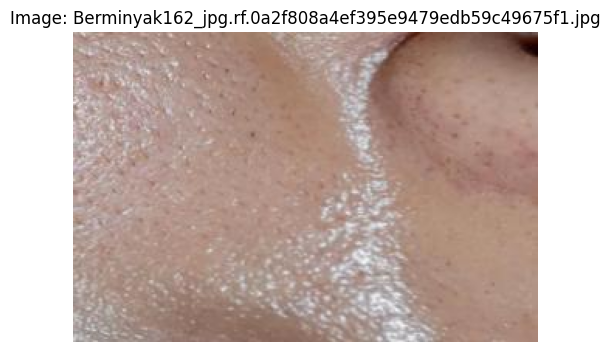

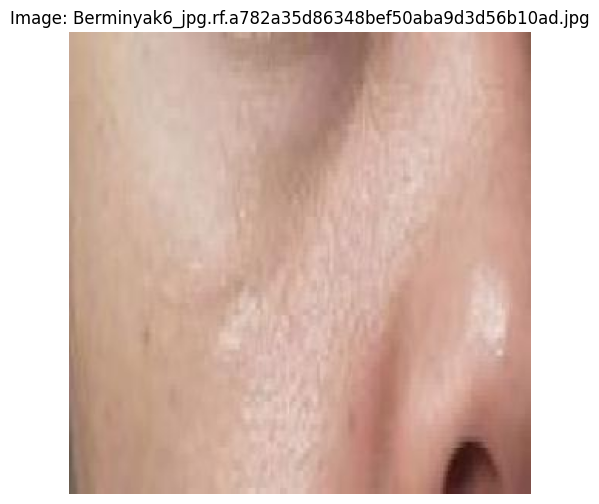

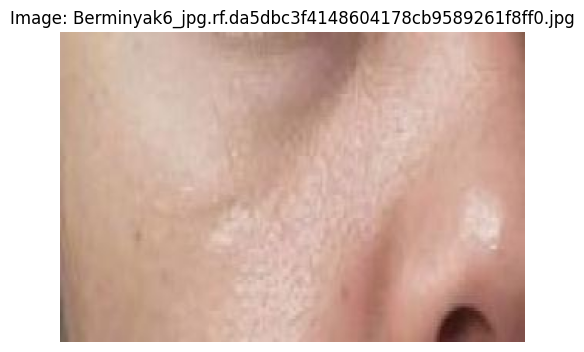

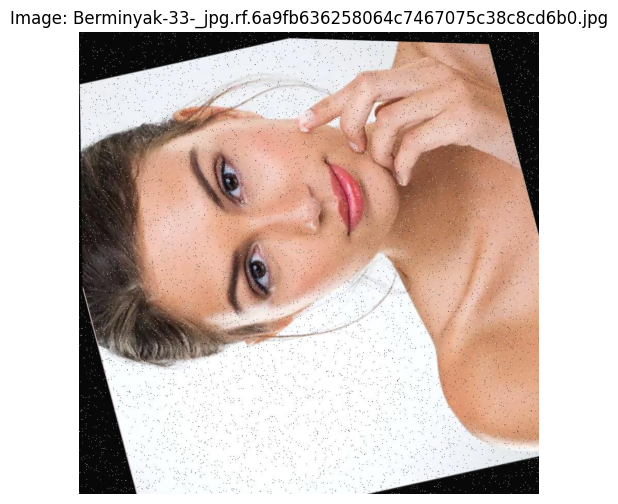

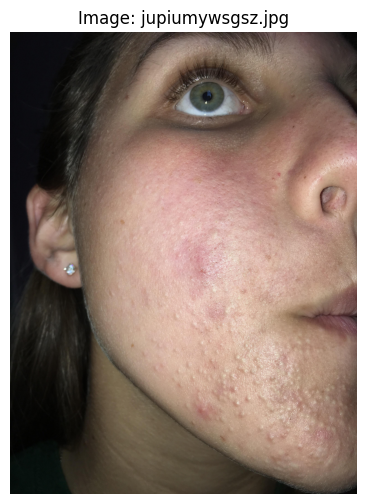

In [ ]:
# Import libraries
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# Path to the directory containing the Dataset images
dataset_dir = "/content/Dataset/valid/oily"

# List all files in the directory
image_files = [f for f in os.listdir(dataset_dir) if os.path.isfile(os.path.join(dataset_dir, f))]

# Display the first 5 images
print("Displaying 5 example images from the Dataset:")
for i in range(min(5, len(image_files))):
    img_path = os.path.join(dataset_dir, image_files[i])
    img = mpimg.imread(img_path)
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.title(f"Image: {image_files[i]}")
    plt.axis('off')
    plt.show()

### Preprocessing Images

### Global Variables for Image Preprocessing

In [ ]:
batch_size = 64
image_size = (224, 224)

### Preprocessing skin type dataset

In [ ]:
# Import libraries
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define base directory path (if not already defined)
base_dir = '/content/Dataset/'
# Define directories for Skin Type
skin_type_train = base_dir + '/train'
skin_type_valid = base_dir + '/valid'
skin_type_test = base_dir + '/test'

# Create ImageDataGenerator for training data with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Create ImageDataGenerator for validation and test data (only rescaling)
valid_test_datagen = ImageDataGenerator(rescale=1./255)

# Create data generators for Skin Type
train_generator_skin_type = train_datagen.flow_from_directory(
    skin_type_train,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator_skin_type = valid_test_datagen.flow_from_directory(
    skin_type_valid,
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical'
)

test_generator_skin_type = valid_test_datagen.flow_from_directory(
    skin_type_test,
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical'
)

Found 3133 images belonging to 3 classes.
Found 148 images belonging to 3 classes.
Found 30 images belonging to 3 classes.


## Modeling: Defining, Compiling, and Training a Machine Learning Model for Skin Type Classification

### Model Transfer Learning with VGG16
- In this section, we implement transfer learning using the VGG16 architecture.
- Transfer learning is a powerful technique that allows to utilize a pre-trained model on a large dataset (like ImageNet) to improve performance on our specific task which in this case is classifying skin conditions.

In [ ]:
# Import the pre-trained VGG16 model
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model

# Load the VGG16 model with pre-trained weights, excluding the top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False


# Add custom layers on top of the base model
# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)  # Increased number of neurons
x = Dropout(0.5)(x)  # Regularization
x = Dense(256, activation='relu')(x)  # Additional dense layer
x = Dropout(0.5)(x)
skin_type_output = Dense(len(train_generator_skin_type.class_indices), activation='softmax', name='skin_type')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=skin_type_output)

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()

# Train the model
history = model.fit(
    train_generator_skin_type,
    validation_data=validation_generator_skin_type,
    epochs=20,
    verbose=1
)

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_4           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 512)                 │         262,6

 Total params: 15,109,443 (57.64 MB)

 Trainable params: 394,755 (1.51 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 105s 2s/step - accuracy: 0.4305 - loss: 1.1397 - val_accuracy: 0.6554 - val_loss: 0.8229
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 89s 889ms/step - accuracy: 0.6025 - loss: 0.8639 - val_accuracy: 0.6622 - val_loss: 0.7543
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 82s 873ms/step - accuracy: 0.6165 - loss: 0.8178 - val_accuracy: 0.6689 - val_loss: 0.7318
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 82s 928ms/step - accuracy: 0.6520 - loss: 0.7800 - val_accuracy: 0.6622 - val_loss: 0.7202
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 81s 887ms/step - accuracy: 0.6668 - loss: 0.7377 - val_accuracy: 0.7095 - val_loss: 0.7278
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 50s 890ms/step - accuracy: 0.6726 - loss: 0.7270 - val_accuracy: 0.6824 - val_loss: 0.6776
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 81s 884ms/step - accuracy: 0.6664 - loss: 0.7533 - val_accuracy: 0.7027 - val_loss: 0.6752
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 50s 907ms/step - accuracy: 0.6758 - loss: 0.7226 - val_accura

### Fine-Tuning the Transfer Learning Model for Improved Performance
- In this section, we perform fine-tuning on the pre-trained VGG16 model.
- Fine-tuning allows us to improve the model's performance on our specific dataset
- by unfreezing a few layers and training them with a low learning rate

In [ ]:
# Import necessary libraries
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.applications import VGG16
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping


# Fine-tuning: Unfreeze the last few layers of the base model
for layer in base_model.layers[-10:]:
    layer.trainable = True

# Compile the model again with a lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks for early stopping and model checkpointing
checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_accuracy', mode='max')
early_stopping = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)

# Train the model again with fine-tuning
history_finetune = model.fit(
    train_generator_skin_type,
    validation_data=validation_generator_skin_type,
    epochs=15,
    callbacks=[checkpoint, early_stopping],
    verbose=1
)

Epoch 1/15
49/49 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step - accuracy: 0.8762 - loss: 0.3034 - val_accuracy: 0.9054 - val_loss: 0.1951
Epoch 2/15
49/49 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - accuracy: 0.8751 - loss: 0.3080 - val_accuracy: 0.9392 - val_loss: 0.1822
Epoch 3/15
49/49 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.9078 - loss: 0.2571 - val_accuracy: 0.9257 - val_loss: 0.1669
Epoch 4/15
49/49 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.8994 - loss: 0.2771 - val_accuracy: 0.9257 - val_loss: 0.1845
Epoch 5/15
49/49 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.8957 - loss: 0.2541 - val_accuracy: 0.9257 - val_loss: 0.1775
Epoch 6/15
49/49 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.9102 - loss: 0.2322 - val_accuracy: 0.9527 - val_loss: 0.1050
Epoch 7/15
49/49 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.9120 - loss: 0.2180 - val_accuracy: 0.9392 - val_loss: 0.1302
Epoch 8/15
49/49 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.9242 - loss: 0.2130 - val_accuracy: 0.9932 - val_loss:

### Display the best model per epochs base on Validation loss

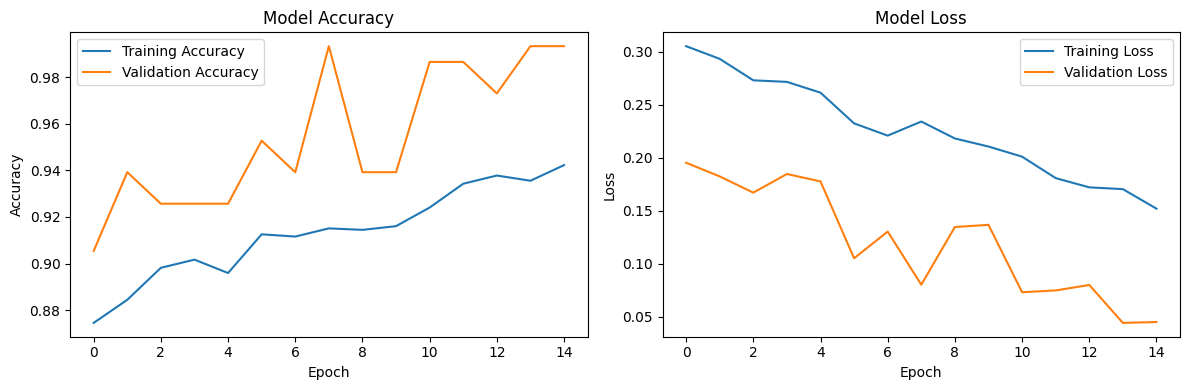


Best epoch based on validation loss: 14
Best validation loss: 0.0440
Best validation accuracy: 0.9932


In [ ]:
# Plot training history to visualize the best epoch
# Import libraries for visualization
import matplotlib.pyplot as plt

def plot_training_history(history):
    # Plot accuracy
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot history
plot_training_history(history_finetune)

# Print the epoch with the best performance
best_epoch = np.argmin(history_finetune.history['val_loss'])
print(f"\nBest epoch based on validation loss: {best_epoch + 1}")
print(f"Best validation loss: {history_finetune.history['val_loss'][best_epoch]:.4f}")
print(f"Best validation accuracy: {history_finetune.history['val_accuracy'][best_epoch]:.4f}")

### Visualizing Model Performance: Accuracy and Loss Over Epochs based on Model that has been Fine Tuning

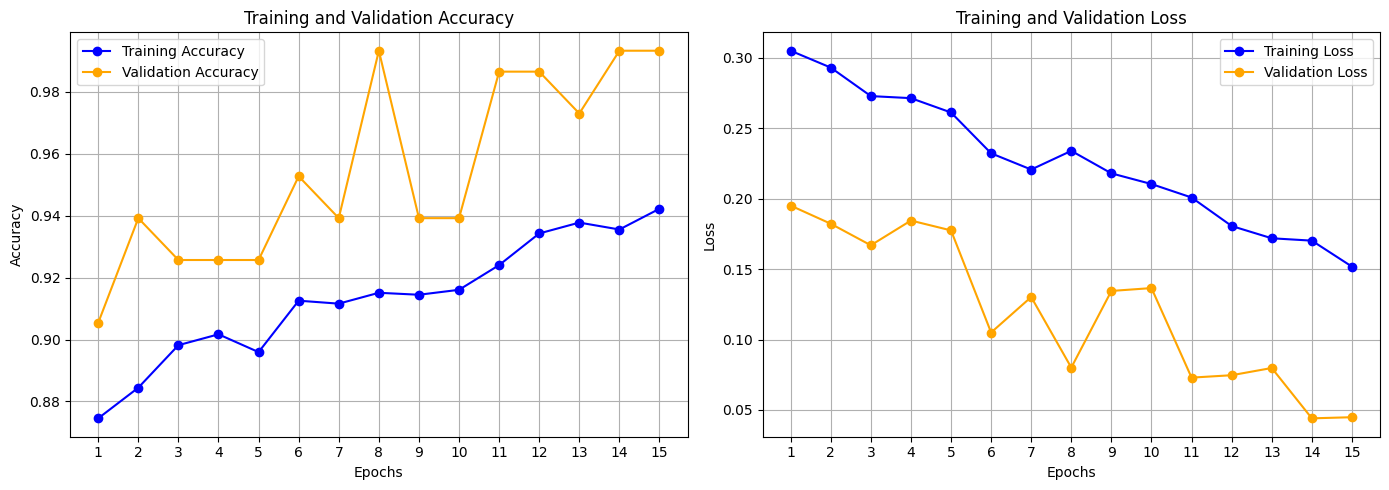

In [ ]:
# Import the matplotlib library for plotting
import matplotlib.pyplot as plt

# Extract accuracy and loss from the training history
train_accuracy = history_finetune.history['accuracy']
val_accuracy = history_finetune.history['val_accuracy']
train_loss = history_finetune.history['loss']
val_loss = history_finetune.history['val_loss']
epochs = range(1, len(train_accuracy) + 1)

# Create a plot for accuracy and loss
plt.figure(figsize=(14, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, label='Training Accuracy', color='blue', marker='o')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', color='orange', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(epochs)  # Menampilkan semua epoch
plt.legend()
plt.grid()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, label='Training Loss', color='blue', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', color='orange', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(epochs)  # Menampilkan semua epoch
plt.legend()
plt.grid()

# Display the plots
plt.tight_layout()
plt.show()

### Visualizing Model Performance: Accuracy and Loss Over Epochs

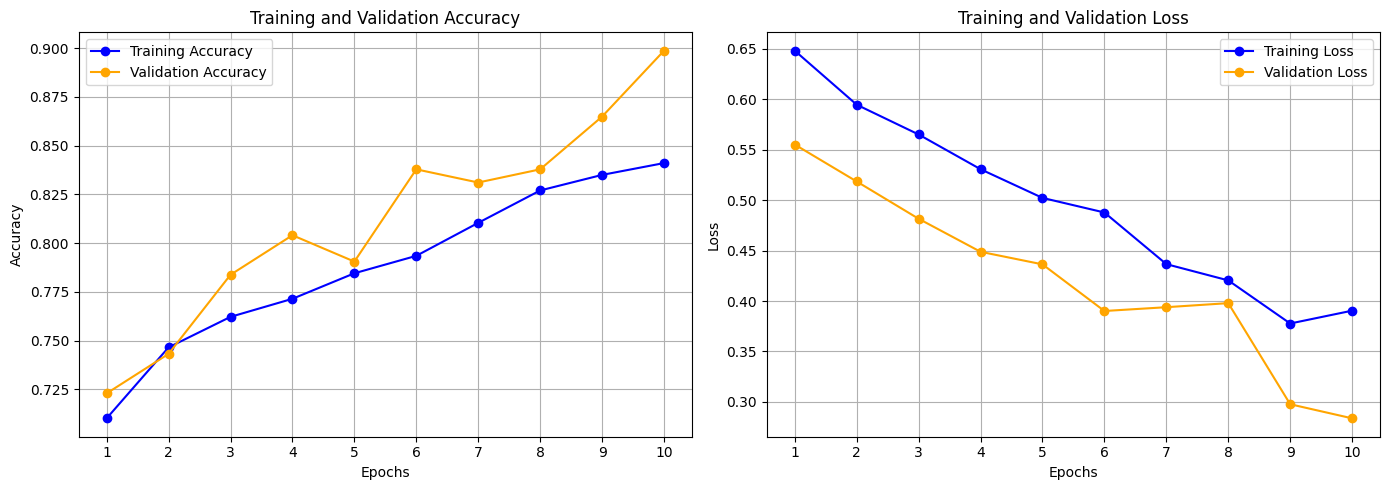

In [ ]:
# Import the matplotlib library for plotting
import matplotlib.pyplot as plt

# Extract accuracy and loss from the training history
train_accuracy = history_finetune.history['accuracy']
val_accuracy = history_finetune.history['val_accuracy']
train_loss = history_finetune.history['loss']
val_loss = history_finetune.history['val_loss']
epochs = range(1, len(train_accuracy) + 1)

# Create a plot for accuracy and loss
plt.figure(figsize=(14, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, label='Training Accuracy', color='blue', marker='o')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', color='orange', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(epochs)  # Menampilkan semua epoch
plt.legend()
plt.grid()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, label='Training Loss', color='blue', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', color='orange', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(epochs)  # Menampilkan semua epoch
plt.legend()
plt.grid()

# Display the plots
plt.tight_layout()
plt.show()

#### Save the model on h5 format

In [ ]:
# Save the model in HDF5 format
model.save('skin_type_model.h5')

## Testing and Evaluation

### Evaluating and Visualizing Model Performance: Accuracy and Predictions

### Image Prediction: Loading, Preprocessing, and Predicting Skin Type using the Model


Prediction Probabilities:
--------------------------------------------------
Normal          :  99.99% | █████████████████████████████████████████████████
Oily            :   0.01% | 
Dry             :   0.00% | 
--------------------------------------------------
Most likely Skin Type: Normal


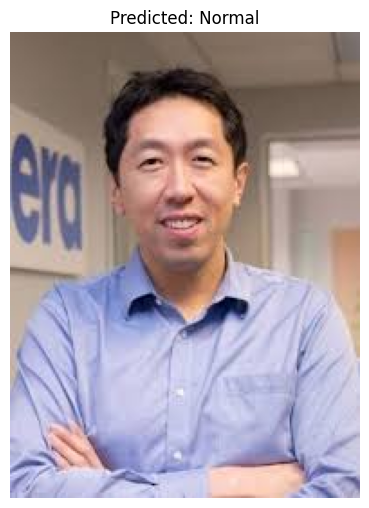

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

def load_and_preprocess_image(img_path, target_size=(224, 224)):
    """Load an image and preprocess it for the model."""
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0
    return img_array

def display_predictions(predictions, class_labels):
    """Display predictions in a clear, readable format."""
    print("\nPrediction Probabilities:")
    print("-" * 50)

    # Get probabilities from the prediction array
    probs = predictions[0]  # Access the correct array

    # Create list of (probability, class_label) tuples
    prob_pairs = list(zip(probs, class_labels))

    # Sort by probability in descending order
    prob_pairs.sort(key=lambda x: x[0], reverse=True)

    # Display each class probability with a simple bar
    for prob, label in prob_pairs:
        percentage = prob * 100
        bars = "█" * int(percentage / 2)  # Create a visual bar (1 block = 2%)
        print(f"{label:<15} : {percentage:>6.2f}% | {bars}")

    print("-" * 50)
    print(f"Most likely Skin Type: {class_labels[np.argmax(predictions[0])]}")

def predict_image(model, img_path, class_labels):
    """Predict the skin type of the loaded image with readable probabilities."""
    # Load and preprocess the image
    img_array = load_and_preprocess_image(img_path)

    # Make predictions
    predictions = model.predict(img_array, verbose=0)

    # Display the image with prediction
    plt.figure(figsize=(8, 10))
    plt.subplot(2, 1, 1)
    plt.imshow(image.load_img(img_path))
    plt.axis('off')
    plt.title(f'Predicted: {class_labels[np.argmax(predictions)]}')

    # Display readable probabilities
    display_predictions(predictions, class_labels)

    # Show the plot
    plt.tight_layout()
    plt.show()

    return class_labels[np.argmax(predictions)]

# Example usage:
class_labels = ['Dry', 'Normal', 'Oily']  # Your class labels
img_path = '/content/andrew.jpg'
predicted_type = predict_image(model, img_path, class_labels)

### Image Prediction with Detailed Probability Visualization: Predicting Skin Conditions and Displaying Confidence Levels


Prediction Probabilities:
--------------------------------------------------
Oily            :  76.56% | ██████████████████████████████████████
Normal          :  13.45% | ██████
Dry             :   9.98% | ████
--------------------------------------------------
Most likely Skin Type: Oily


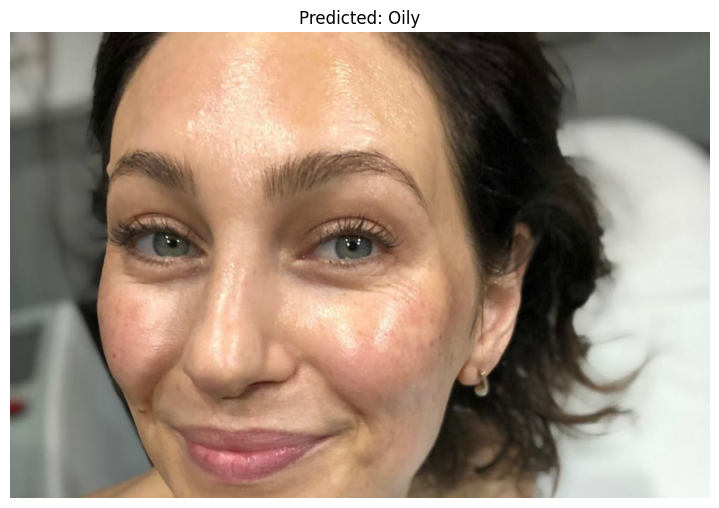

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

def load_and_preprocess_image(img_path, target_size=(224, 224)):
    """Load an image and preprocess it for the model."""
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0
    return img_array

def display_predictions(predictions, class_labels):
    """Display predictions with light blue bars and navy blue highlight for highest probability."""
    print("\nPrediction Probabilities:")
    print("-" * 50)

    # Get probabilities from the predictions array
    probs = predictions[0]

    # Create list of (probability, class_label) tuples
    prob_pairs = list(zip(probs, class_labels))

    # Sort by probability in descending order
    prob_pairs.sort(key=lambda x: x[0], reverse=True)

    # Get the highest probability for comparison
    highest_prob = prob_pairs[0][0]

    # Colors
    LIGHT_BLUE = '\033[38;5;117m'  # LIGHT BLUE for regular probabilities
    LAVENDER = '\033[38;5;189m'     # LAVENDER for highest probability
    RESET = '\033[0m'

    # Display each class probability with a colored bar
    for prob, label in prob_pairs:
        percentage = prob * 100
        bars = "█" * int(percentage / 2)  # Create a visual bar (1 block = 2%)

        # Use navy blue for highest probability, light blue for others
        color = LIGHT_BLUE if prob == highest_prob else LAVENDER
        print(f"{label:<15} : {percentage:>6.2f}% | {color}{bars}{RESET}")

    print("-" * 50)
    print(f"Most likely Skin Type: {class_labels[np.argmax(predictions[0])]}")

def predict_image(model, img_path, class_labels):
    """Predict the skin type of the loaded image with readable probabilities."""
    # Load and preprocess the image
    img_array = load_and_preprocess_image(img_path)

    # Make predictions
    predictions = model.predict(img_array, verbose=0)

    # Display the image with prediction
    plt.figure(figsize=(8, 10))
    plt.subplot(2, 1, 1)
    plt.imshow(image.load_img(img_path))
    plt.axis('off')
    plt.title(f'Predicted: {class_labels[np.argmax(predictions[0])]}')

    # Display readable probabilities
    display_predictions(predictions, class_labels)

    # Show the plot
    plt.tight_layout()
    plt.show()

    return class_labels[np.argmax(predictions[0])]

# Example usage:
class_labels = ['Dry', 'Normal', 'Oily']
img_path = '/content/dide.jpg'
predicted_condition = predict_image(model, img_path, class_labels)

### Creating a ZIP Archive of the Dataset Directory


In [ ]:
# Import module for operation
import shutil
import os

# Path to the Dataset folder
dataset_dir = '/content/Dataset'
zip_file_path = '/content/data_skin type'

# Create a ZIP archive of the Dataset folder
shutil.make_archive(zip_file_path.replace('.zip', ''), 'zip', dataset_dir)

# Print confirmation message
print(f"File ZIP telah dibuat: {zip_file_path}")

File ZIP telah dibuat: /content/data_skin type


### Load the keras model and  save Model to h5 format

In [ ]:
# Import libaries
import tensorflow as tf

# Load model .keras
model = tf.keras.models.load_model('/content/best_model.keras')

# Save to .h5 format
model.save('skin_condition_model.h5')
print("Model berhasil disimpan dalam format H5")

Model berhasil disimpan dalam format H5
